# Bathymetry

A simple example to show how to plot the model bathymetry that the ACCESS-OM2 0.1° uses.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cft
import cartopy.mpl.ticker as cticker
import cmocean as cm
import IPython.display

First we load the bathymetry and the ocean grid.

In [2]:
bathymetry = xr.open_dataset('/g/data/hh5/tmp/cosima/bathymetry/topog_latest.nc')
oceangrid = xr.open_dataset('/g/data/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc')

`ocean_hgrid` contains the, so-called, "supergrid". To plot `bathymetry` we, therefore, need to use alternate values for the longitudes and latitudes from `ocean_hgrid`.

In [3]:
lons, lats = oceangrid.x.values[::2, ::2], oceangrid.y.values[::2, ::2]

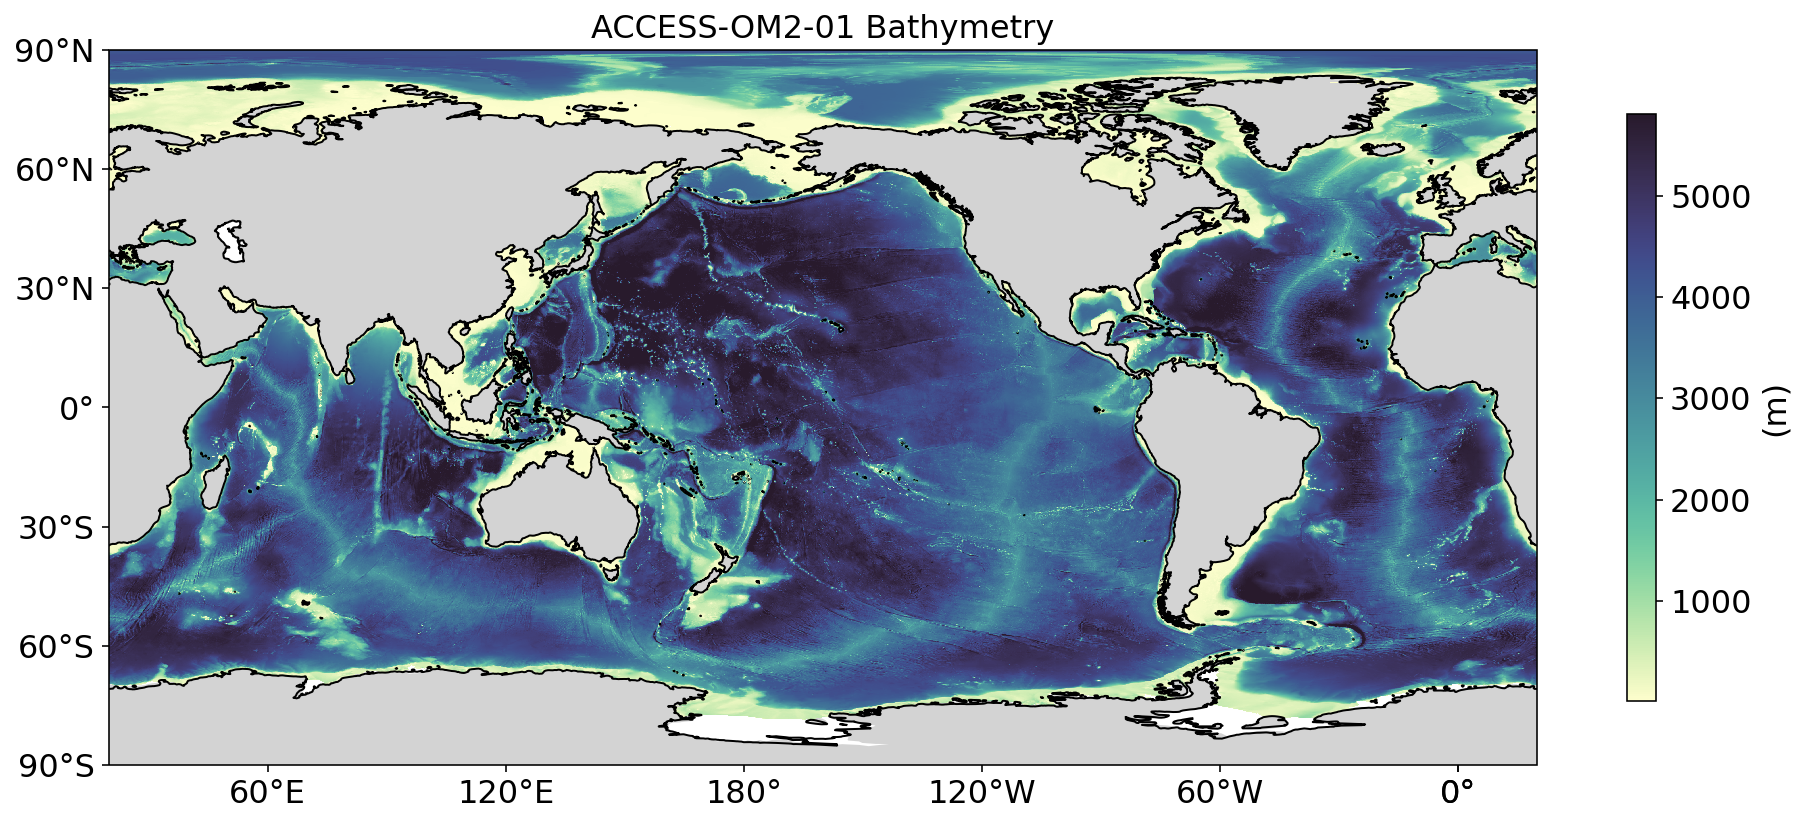

In [4]:
plt.figure(figsize=(16, 9))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=200))
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND, color='lightgrey')

plt.pcolormesh(lons, lats, bathymetry.depth,
               cmap=cm.cm.deep, transform=ccrs.PlateCarree()) 

# set colour bar tick size
plt.colorbar(shrink=0.6).set_label('(m)', fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

# set custom longitude and latitude values with correct formatting
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())   
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.yaxis.tick_left()
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter) # set format of x-axis
ax.yaxis.set_major_formatter(lat_formatter) # "       "       "
ax.xaxis.label.set_visible(False) # only labels on left & bottom
ax.yaxis.label.set_visible(False)
# set longitude and latitude tick size
ax.tick_params(labelsize=16)
        
plt.title('ACCESS-OM2-01 Bathymetry', fontsize=16);

# plt.savefig('bathyetry', dpi=300, facecolor='w', edgecolor='w', orientation='landscape',
#             papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)